# This notebook contains linear regression project called weight - height using simple regression and linear regression with Keras.

# Linear Regression

# Importing Dependencies

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
# Read Data

df = pd.read_csv('weight-height.csv')

In [73]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [75]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
Gender    10000 non-null object
Height    10000 non-null float64
Weight    10000 non-null float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


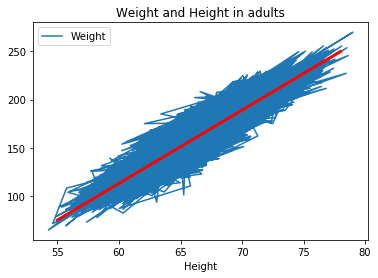

In [23]:
df.plot(x = 'Height',y = 'Weight',title = 'Weight and Height in adults')

plt.plot([55, 78], [75, 250], color='red', linewidth=3)

In [24]:
def line(x, w=0, b=0):
    return x * w + b

In [25]:
x = np.linspace(55,80,100)

In [26]:
x

array([55.        , 55.25252525, 55.50505051, 55.75757576, 56.01010101,
       56.26262626, 56.51515152, 56.76767677, 57.02020202, 57.27272727,
       57.52525253, 57.77777778, 58.03030303, 58.28282828, 58.53535354,
       58.78787879, 59.04040404, 59.29292929, 59.54545455, 59.7979798 ,
       60.05050505, 60.3030303 , 60.55555556, 60.80808081, 61.06060606,
       61.31313131, 61.56565657, 61.81818182, 62.07070707, 62.32323232,
       62.57575758, 62.82828283, 63.08080808, 63.33333333, 63.58585859,
       63.83838384, 64.09090909, 64.34343434, 64.5959596 , 64.84848485,
       65.1010101 , 65.35353535, 65.60606061, 65.85858586, 66.11111111,
       66.36363636, 66.61616162, 66.86868687, 67.12121212, 67.37373737,
       67.62626263, 67.87878788, 68.13131313, 68.38383838, 68.63636364,
       68.88888889, 69.14141414, 69.39393939, 69.64646465, 69.8989899 ,
       70.15151515, 70.4040404 , 70.65656566, 70.90909091, 71.16161616,
       71.41414141, 71.66666667, 71.91919192, 72.17171717, 72.42

In [27]:
yhat = line(x , w=0 , b =0)

In [28]:
yhat

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# Cost Function

In [29]:
def mean_squared_error(y_true , y_pred):
    s =(y_true - y_pred)**2
    return s.mean()

In [30]:
X = df[['Height']].values

In [31]:
y_true = df['Weight'].values

In [32]:
y_true

array([241.89356318, 162.31047252, 212.74085556, ..., 128.47531878,
       163.85246135, 113.64910268])

In [33]:
y_pred = line(X)

In [34]:
y_pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [35]:
mean_squared_error(y_true, y_pred.ravel())

27093.83757456157

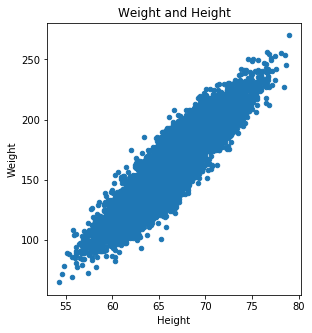

In [79]:
plt.figure(figsize=(10, 5))

ax1 = plt.subplot(121)
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height', ax=ax1)


Text(0.5,0,'b')

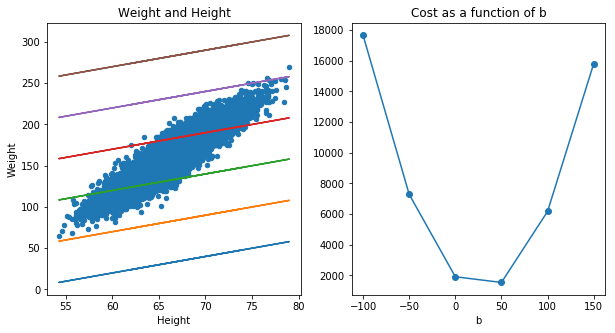

In [78]:
plt.figure(figsize=(10, 5))

# we are going to draw 2 plots in the same figure
# first plot, data and a few lines
ax1 = plt.subplot(121)
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height', ax=ax1)

# let's explore the cost function for a few values of b between -100 and +150
bbs = np.array([-100, -50, 0, 50, 100, 150])
mses = []  # we will append the values of the cost here, for each line
for b in bbs:
    y_pred = line(X, w=2, b=b)
    mse = mean_squared_error(y_true, y_pred)
    mses.append(mse)
    plt.plot(X, y_pred)

# second plot: Cost function
ax2 = plt.subplot(122)
plt.plot(bbs, mses, 'o-')
plt.title('Cost as a function of b')
plt.xlabel('b')

# Linear Regression with Keras 

In [38]:
from keras.models import Sequential  # sequential because we will be adding elements to this model in a sequence. 
from keras.layers import Dense       
from keras.optimizers import Adam, SGD # helps to change the values of w and b to get to the minimum cost.

Using TensorFlow backend.


In [39]:
model = Sequential()

In [40]:
model.add(Dense(1, input_shape=(1,)))   # adding a dense layer to the model.

In [41]:
model.summary()

# the model has 1 output and 2 parameters.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(Adam(lr=0.8), 'mean_squared_error')  # compiling model using tensorflow

# loss = cost function('mean_squared_error')

In [43]:
model.fit(X, y_true, epochs=40)


# epochs = no. of iterations.
# Keras is exploring diffrent values for b and w by performing iterations.
# We can see that value of loss(cost_function) is going down by each iteration.

Epoch 1/40
10000/10000 [==============================] - 1s 147us/step - loss: 703.3425
Epoch 2/40
10000/10000 [==============================] - 0s 23us/step - loss: 531.1382
Epoch 3/40
10000/10000 [==============================] - 0s 22us/step - loss: 484.8153
Epoch 4/40
10000/10000 [==============================] - 0s 21us/step - loss: 439.8050
Epoch 5/40
10000/10000 [==============================] - 0s 23us/step - loss: 396.8881
Epoch 6/40
10000/10000 [==============================] - 0s 22us/step - loss: 368.5116
Epoch 7/40
10000/10000 [==============================] - 0s 30us/step - loss: 308.7704
Epoch 8/40
10000/10000 [==============================] - 0s 22us/step - loss: 284.5184
Epoch 9/40
10000/10000 [==============================] - 0s 23us/step - loss: 291.3121
Epoch 10/40
10000/10000 [==============================] - 0s 29us/step - loss: 241.1423
Epoch 11/40
10000/10000 [==============================] - 0s 30us/step - loss: 233.8788
Epoch 12/40
10000/10000 [====

In [44]:
y_pred = model.predict(X)

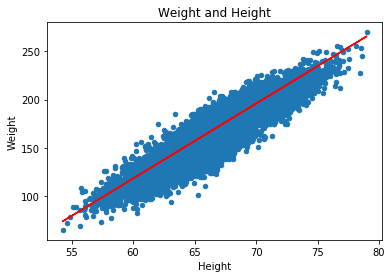

In [77]:
# Predicting usig Scatter plot

df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height')
plt.plot(X, y_pred, color='red')

In [46]:
W, B = model.get_weights()

In [47]:
W

array([[7.7773757]], dtype=float32)

In [48]:
B

array([-348.5435], dtype=float32)

# Evaluating Model Performance

In [81]:
from  sklearn.metrics import r2_score

**sklearn.metrics.r2_score(y_true, y_pred, sample_weight=None, multioutput=’uniform_average’)

**R^2 (coefficient of determination) regression score function.**

Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.


# Parameters:	
y_true : array-like of shape = (n_samples) or (n_samples, n_outputs)

Ground truth (correct) target values.

**pred** : array-like of shape = (n_samples) or (n_samples, n_outputs)

Estimated target values.

sample_weight : array-like of shape = (n_samples), optional

Sample weights.

multioutput : string in [‘raw_values’, ‘uniform_average’, ‘variance_weighted’] or None or array-like of shape (n_outputs)

Defines aggregating of multiple output scores. Array-like value defines weights used to average scores. Default is “uniform_average”.

‘raw_values’ :
Returns a full set of scores in case of multioutput input.

‘uniform_average’ :
Scores of all outputs are averaged with uniform weight.

‘variance_weighted’ :
Scores of all outputs are averaged, weighted by the variances of each individual output.

In [50]:
print("The R2 score is {:0.3f}".format(r2_score(y_true, y_pred)))

The R2 score is 0.818


# Train Test Split

In [51]:
# Testing model

from sklearn.model_selection import train_test_split

In [52]:
# Splitting data into train(80%) and test data (20%)

X_train, X_test, y_train, y_test = train_test_split(X, y_true,
                                                    test_size=0.2)

In [53]:
len(X_train)

8000

In [54]:
len(X_test)

2000

In [55]:
# Setting Weights and Bias to zero to allow model to learn again

W[0, 0] = 0.0
B[0] = 0.0
model.set_weights((W, B))

In [56]:
model.fit(X_train, y_train, epochs=50, verbose=0)

In [80]:
# ravel is used to flatten the array instead of column array

y_train_pred  = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()

# Error Calculations

In [69]:
from sklearn.metrics import mean_squared_error as mse

In [70]:
print("The Mean Squared Error on the Train set is:\t{:0.1f}".format(mse(y_train, y_train_pred)))
print("The Mean Squared Error on the Test set is:\t{:0.1f}".format(mse(y_test, y_test_pred)))

The Mean Squared Error on the Train set is:	153.0
The Mean Squared Error on the Test set is:	154.8


In [71]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

# the closer R^2 score is to 1 the better

The R2 score on the Train set is:	0.852
The R2 score on the Test set is:	0.848
